# Foodies Shop Explore Data Analysis

---

1. In this notebook, we will explore each features in the table to see which columns is usable for ranking.

In [4]:
from utils import read_csv
import pandas as pd

In [6]:
shop = read_csv("shop")

In [8]:
print(shop.shape)
shop.columns
# Interesting features includes (I'm imagining all the data are real)
features = [
    'description', # Maybe longer -> better?? Or descrption with some certain keywords has better score. (NLP)
    'tel', 'website', 'line', 'facebook', 'instagram', # have vs doesn't have
    'no_room', # more = better?
    'no_floor', # higher = better? (will have low weight)
    'lat', 'lng', # For location score
    'shop_price_from', 'shop_price_to', # Price features
    'has_carpark', # has = better
    'worktime', # more opening hour ~~ better
    'last_order', # more late ~~ better
]

(65040, 34)


In [9]:
# Let's see how many of them looks ready.
shop[features].notnull().sum()

description           40
tel                40198
website             6786
line                4876
facebook           16679
instagram           4464
no_room               40
no_floor              40
lat                57358
lng                57358
shop_price_from    65040
shop_price_to      65040
has_carpark        65033
worktime           44116
last_order         65040
dtype: int64

In [14]:
# Let's see description
shop.description.dropna().value_counts()
# Nope.

Shop Description    35
shooopim             1
wqed                 1
ward                 1
wafs                 1
wae                  1
Name: description, dtype: int64

In [44]:
# Count number of tel.
shop['tel_count'] = shop.tel.dropna().apply(lambda x: len(x.split(",")))
shop['tel_count'] = shop.tel_count.fillna(0)
shop['tel_count'].value_counts().sort_values()
# TODO: clean the data, delete all not number, remove all invalid looking telephone number

5.0        1
4.0      159
3.0     1680
2.0     8481
0.0    24842
1.0    29877
Name: tel_count, dtype: int64

In [121]:
def clean_feature(col, condition, default = False):
    return col.apply(lambda x: condition(x) if(not pd.isnull(x)) else x).fillna(default)

shop['has_website'] = clean_feature(shop['website'], lambda x: x.find("http") == 0)
shop['has_line'] = clean_feature(shop['line'], lambda x: len(x) > 0).fillna(0)
shop['has_facebook'] = clean_feature(shop['facebook'], lambda x: len(x) > 0).fillna(0)
shop['has_instagram'] = clean_feature(shop['instagram'], lambda x: len(x) > 0).fillna(0)
shop['has_all'] = shop['has_website'] & shop['has_line'] & shop['has_facebook'] & shop['has_instagram']

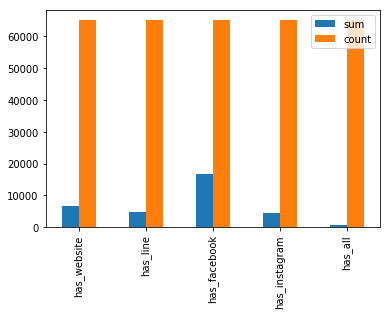

In [127]:
shop[['has_website', 'has_line','has_facebook', 'has_instagram', 'has_all']] \
    .agg(['sum','count']) \
    .transpose() \
    .plot(kind='bar') 

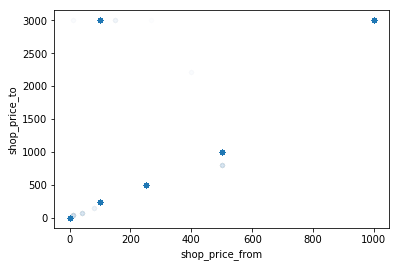

In [128]:
shop.plot(x = 'shop_price_from', y = 'shop_price_to', kind='scatter', alpha = 0.01)
# We could play wiht this features
# 1. Range of price. (higher= more diverse o.0)
# 2. Avg of price. (Higher price = more luxury)
# 3. Price_from lowest (for budget member)

In [130]:
# TODO: check on worktime and lastorder